<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94_%D0%B712_Pro_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя модуль datasets библиотеки sklearn, загрузите базу вин (.load_wine()).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

С помощью метода .summary() зафиксируйте количество параметров созданной вами нейронной сети.



**Шаблон ноутбука**

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

**Описание базы**

In [ ]:
Датасет состоит из набора данных о винах и их классах.
Данные по одному вину хранятся в numpy-массиве x_data: (13 параметров).
В датасете 3 класса вин: y_data.
Количество примеров: 178.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


**Подготовка данных**

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


Модель 1

Создание модели

In [ ]:
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 2,443
Trainable params: 2,443
Non-trainable params: 0
_________________________________________________________________


Обучение модели

Epoch 1/500
5/5 [==============================] - 7s 542ms/step - loss: 9.9491 - accuracy: 0.2500 - val_loss: 5.6060 - val_accuracy: 0.3750
Epoch 2/500
5/5 [==============================] - 1s 148ms/step - loss: 6.9845 - accuracy: 0.4306 - val_loss: 6.8261 - val_accuracy: 0.6250
Epoch 3/500
5/5 [==============================] - 1s 132ms/step - loss: 5.7744 - accuracy: 0.4722 - val_loss: 4.2788 - val_accuracy: 0.3125
Epoch 4/500
5/5 [==============================] - 0s 83ms/step - loss: 4.4585 - accuracy: 0.1736 - val_loss: 4.9777 - val_accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 0s 41ms/step - loss: 4.1372 - accuracy: 0.1181 - val_loss: 3.1161 - val_accuracy: 0.4375
Epoch 6/500
5/5 [==============================] - 0s 25ms/step - loss: 3.1152 - accuracy: 0.4653 - val_loss: 2.6328 - val_accuracy: 0.5000
Epoch 7/500
5/5 [==============================] - 0s 23ms/step - loss: 2.5008 - accuracy: 0.2778 - val_loss: 2.3386 - val_accuracy: 0.1875
Epoch 8/500
5

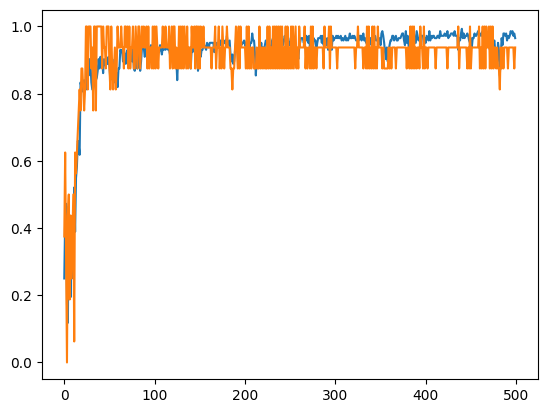

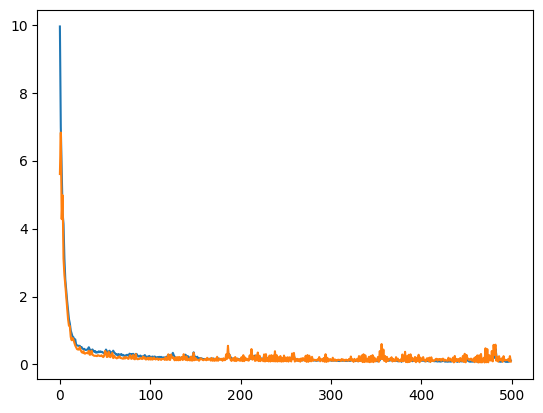

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 500,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Оценка модели на тестовой выборке

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.1468 - accuracy: 0.9444


[0.14675748348236084, 0.9444444179534912]

Тестирование модели

In [ ]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 [==============================] - 0s 102ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 1, было 0, False
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True

 Процент верных предсказаний - 94.44444444444444 %


Модель 2

Создание модели

In [ ]:
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(200, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               2800      
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 23,603
Trainable params: 23,403
Non-trainable params: 200
________________________________________________

Обучение модели

Epoch 1/240
5/5 [==============================] - 2s 117ms/step - loss: 0.1345 - accuracy: 0.9583 - val_loss: 0.2020 - val_accuracy: 0.8750
Epoch 2/240
5/5 [==============================] - 0s 20ms/step - loss: 0.0468 - accuracy: 0.9792 - val_loss: 0.2729 - val_accuracy: 0.9375
Epoch 3/240
5/5 [==============================] - 0s 25ms/step - loss: 0.1001 - accuracy: 0.9514 - val_loss: 0.7622 - val_accuracy: 0.7500
Epoch 4/240
5/5 [==============================] - 0s 21ms/step - loss: 0.1439 - accuracy: 0.9444 - val_loss: 0.4530 - val_accuracy: 0.8750
Epoch 5/240
5/5 [==============================] - 0s 27ms/step - loss: 0.0417 - accuracy: 0.9931 - val_loss: 0.1376 - val_accuracy: 0.8750
Epoch 6/240
5/5 [==============================] - 0s 23ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 1.1609 - val_accuracy: 0.6875
Epoch 7/240
5/5 [==============================] - 0s 24ms/step - loss: 0.0930 - accuracy: 0.9722 - val_loss: 0.6581 - val_accuracy: 0.8125
Epoch 8/240
5/5 [==

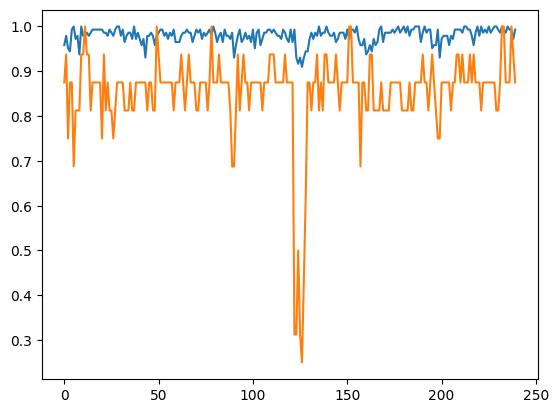

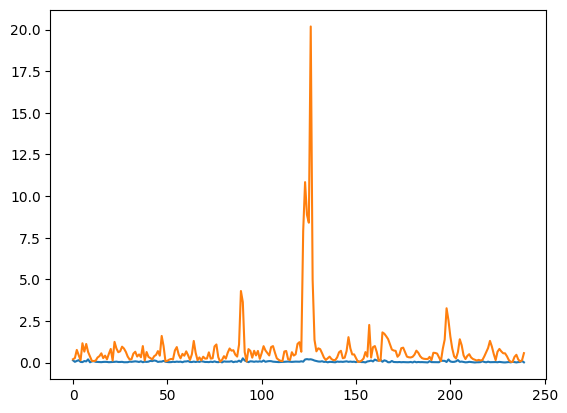

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 240,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Оценка модели на тестовой выборке

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.4357 - accuracy: 0.8889


[0.4356902539730072, 0.8888888955116272]

Тестирование модели

In [ ]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 [==============================] - 0s 89ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 1, было 0, False
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 0, False

 Процент верных предсказаний - 88.88888888888889 %
